**Part 2, Newton Method:**

In [78]:
import numpy as np
import matplotlib.pyplot as plt

Newthond method implementation for finding the local minima:

In [25]:
def function (x1, x2):
    f = (2 * (x1 ** 2)) + (2 * (x2 ** 2)) - (17 * x2 * np.cos(0.2 * np.pi * x1)) - (x1 * x2)
    return f

def gradient_calc (x1, x2):
    dx1 = (4 * x1) - x2 + (3.4 * np.pi * x2 * np.sin(0.2 * np.pi * x1))
    dx2 = (4 * x2) - x1 - (17 * np.cos(0.2 * np.pi * x1))
    gradient = np.array([[dx1],[dx2]])
    return gradient

def Hessian_calc (x1, x2):
    d2x1 = (4) + (0.68 * (np.pi ** 2) * x2 * np.cos(0.2 * np.pi * x1))
    dx1dx2 = -1 + (3.4 * np.pi * np.sin(0.2 * np.pi * x1))
    dx2dx1 = -1 + (3.4 * np.pi * np.sin(0.2 * np.pi * x1))
    d2x2 = 4
    Hessian = np.array(([d2x1, dx1dx2],[dx2dx1, d2x2]),dtype='float')
    return Hessian

def find_local_min (x1, x2, num_epochs):
    function_values = []
    x = np.array([[x1],[x2]])
    for i in range(num_epochs):
        Hessian_Inv = np.linalg.inv(Hessian_calc(x1, x2))
        gradient = gradient_calc(x1, x2)
        x = x - np.dot(Hessian_Inv, gradient)
        x1 = x[0][0]
        x2 = x[1][0]
        function_values.append(function(x1,x2))
    return min(function_values)

with the start point of (1,3):

In [52]:
x1 = 1
x2 = 3
num_epochs = 20
print('local minimum of the function: ', find_local_min (x1, x2, num_epochs))

local minimum of the function:  -36.40349774185023


for the points in x1 and x2 intervals with step size = 0.5:

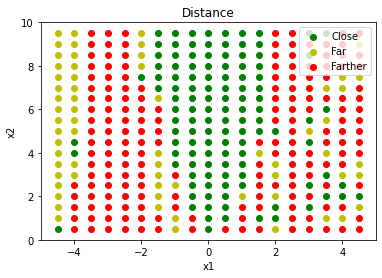

In [77]:
x1 = np.arange(-4.5, 5, 0.5)
x2 = np.arange(0.5, 10, 0.5)

num_epochs = 20
min_values = []

for x in x1:
    for y in x2:
        minimum = find_local_min (x, y, num_epochs)
        distance = np.abs(-36.4 - minimum)
        if (distance <= 10):
            close = plt.scatter(x, y, color = 'g', label = 'colse')
        elif (distance <= 40):
            far = plt.scatter(x, y, color = 'y', label = 'far')
        else:
            farther = plt.scatter(x, y, color = 'r', label = 'farther')

plt.xlim(-5, 5)
plt.ylim(0, 10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distance')
plt.legend(framealpha=1, frameon=True)
plt.legend((close, far, farther),('Close', 'Far', 'Farther'))
plt.show()


**Part 3, Genetic Algorithm:**

In [86]:
from numpy.random import randint
from numpy.random import rand

First, I define the previous objective function as below:

In [87]:
def objective (x):
	x1 = x[0]
	x2 = x[1]
	f = (2 * (x1 ** 2)) + (2 * (x2 ** 2)) - (17 * x2 * np.cos(0.2 * np.pi * x1)) - (x1 * x2)
	return f

Then, the selection, crossover, and mutation steps are defined in seperate functions as below.

The selection procedure takes the population and returns one selected parent.

The crossover function uses crossover_rate to determine if crossover is performed, then selecting a valid split point if crossover is to be performed.

The mutation procedure simply flips bits with a low probability controlled by the mutation_rate.


In [88]:
def selection(pop, scores, k=3):
	random_selection = randint(len(pop))
	for individual in randint(0, len(pop), k-1):
		if scores[individual] < scores[random_selection]:
			random_selection = individual
	return pop[random_selection]
 

def crossover(parent1, parent2, crossover_rate):
	child1, child2 = parent1.copy(), parent2.copy()
	if rand() < crossover_rate:
		crossover_point = randint(1, len(parent1)-2)
		child1 = parent1[:crossover_point] + parent2[crossover_point:]
		child2 = parent2[:crossover_point] + parent1[crossover_point:]
	return [child1, child2]
 
def mutation(bitstring, mutation_rate):
	for i in range(len(bitstring)):
		if rand() < mutation_rate:
			bitstring[i] = 1 - bitstring[i]

Then, I decode the bitstrings to numbers prior to evaluating each with the objective function.

First, I take the bounds of the function, the number of bits per variable, and a bitstring as input.
Then, I decode each substring to an integer, scale the integer to the desired range, and return a list of decoded real values.

In [89]:
def decode(bounds, num_bits, string_of_bits):
	decoded = list()
	largest = 2 ** num_bits
	for i in range(len(bounds)):
		start, end = i * num_bits, (i * num_bits) + num_bits
		substring = string_of_bits[start:end]
		chars = ''.join([str(s) for s in substring])
		integer = int(chars, 2)
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		decoded.append(value)
	return decoded

Finally, the genetic algorithm function is implemented as below:

In [90]:
def genetic_algorithm(objective, bounds, n_bits, n_iter, population_size, crossover_rate, mutation_rate):
	population = [randint(0, 2, n_bits * len(bounds)).tolist() for _ in range(population_size)]
	best, best_eval = 0, objective(decode(bounds, n_bits, population[0]))

	for gen in range(n_iter):
		decoded = [decode(bounds, n_bits, individual) for individual in population]
		scores = [objective(d) for d in decoded]

		for individual in range(population_size):
			if scores[individual] < best_eval:
				best, best_eval = population[individual], scores[individual]
				print(">%d, new best f(%s) = %f" % (gen,  decoded[individual], scores[individual]))

		selected = [selection(population, scores) for _ in range(population_size)]

		children = list()
		for i in range(0, population_size, 2):
			parent1, parent2 = selected[i], selected[i+1]
			for child in crossover(parent1, parent2, crossover_rate):
				mutation(child, mutation_rate)
				children.append(child)

		population = children
	return [best, best_eval]

In [91]:
# define range for input
bounds = [[-15.0, 15.0], [-15.0, 15.0]]

# bits per variable
n_bits = 16

# define the population size
n_pop = 100

# define the total iterations
n_iter = 100

# crossover rate
r_cross = 0.9

# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-1.50238037109375, 0.51361083984375]) = 0.691916
>0, new best f([0.28656005859375, 0.400543212890625]) = -6.328837
>1, new best f([-4.2828369140625, -6.276397705078125]) = -7.457475
>1, new best f([-0.46875, 1.45294189453125]) = -18.293838
>1, new best f([0.28656005859375, 4.685211181640625]) = -35.636989
>2, new best f([0.28656005859375, 4.59503173828125]) = -35.776654
>2, new best f([0.27191162109375, 4.216461181640625]) = -36.077803
>8, new best f([0.08148193359375, 4.537811279296875]) = -36.214723
>9, new best f([0.05218505859375, 4.45220947265625]) = -36.229432
>10, new best f([0.08148193359375, 4.069061279296875]) = -36.287163
>10, new best f([0.144195556640625, 4.20684814453125]) = -36.392980
>13, new best f([0.11077880859375, 4.27093505859375]) = -36.396900
>14, new best f([0.14373779296875, 4.246673583984375]) = -36.399843
>16, new best f([0.125885009765625, 4.26361083984375]) = -36.403051
>17, new best f([0.125885009765625, 4.27093505859375]) = -36.403077
>20,

Checking the algorithm for different crossover and mutation rates and checking convergence:

In [95]:
# crossover rate
r_cross = 0.1

# mutation rate
r_mut = 10.0 / (float(n_bits) * len(bounds))

best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-1.6314697265625, 1.7779541015625]) = -1.141436
>0, new best f([-5.0885009765625, -5.65338134765625]) = -9.019044
>0, new best f([-0.390472412109375, 0.941619873046875]) = -13.082275
>1, new best f([-0.618896484375, 2.560272216796875]) = -24.814496
>3, new best f([-0.010528564453125, 2.86376953125]) = -32.250292
>9, new best f([-0.159759521484375, 3.973388671875]) = -34.946116
>13, new best f([0.00274658203125, 3.817291259765625]) = -35.760899
>53, new best f([0.125885009765625, 4.75799560546875]) = -35.923261
>85, new best f([0.28839111328125, 4.26177978515625]) = -36.001279
>95, new best f([0.12542724609375, 4.00634765625]) = -36.265917
Done!
f([0.12542724609375, 4.00634765625]) = -36.265917


In [96]:
# crossover rate
r_cross = 0.01

# mutation rate
r_mut = 100.0 / (float(n_bits) * len(bounds))

best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-6.69525146484375, -3.7738037109375]) = 61.795067
>0, new best f([-5.4290771484375, -0.207366943359375]) = 54.512048
>0, new best f([-2.384033203125, -3.809051513671875]) = 36.018128
>0, new best f([-4.831695556640625, -1.56829833984375]) = 17.520005
>0, new best f([-5.185089111328125, -5.3118896484375]) = -7.032146
>0, new best f([-0.581817626953125, 2.640380859375]) = -25.763969
>0, new best f([-0.471038818359375, 3.080291748046875]) = -29.217143
>2, new best f([0.209197998046875, 2.640380859375]) = -31.020888
Done!
f([0.209197998046875, 2.640380859375]) = -31.020888


In [97]:
# crossover rate
r_cross = 0.01

# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-2.55615234375, -2.397308349609375]) = 16.996544
>0, new best f([0.06500244140625, 6.9708251953125]) = -21.665067
>1, new best f([0.06500244140625, 6.9671630859375]) = -21.704710
>2, new best f([0.06500244140625, 6.8499755859375]) = -22.944958
>3, new best f([0.53375244140625, 5.5645751953125]) = -29.799039
>3, new best f([0.53375244140625, 5.096282958984375]) = -32.016421
>3, new best f([0.53375244140625, 3.6895751953125]) = -33.402082
>4, new best f([0.0640869140625, 5.0042724609375]) = -35.230680
>5, new best f([0.014190673828125, 3.6859130859375]) = -35.538024
>5, new best f([0.06500244140625, 3.6895751953125]) = -35.675923
>7, new best f([0.0640869140625, 4.0667724609375]) = -36.254227
>8, new best f([0.0787353515625, 4.0667724609375]) = -36.281073
>9, new best f([0.062255859375, 4.15283203125]) = -36.302899
>10, new best f([0.062255859375, 4.153289794921875]) = -36.303099
>10, new best f([0.0604248046875, 4.18212890625]) = -36.309955
>11, new best f([0.11535644531

In [98]:
# crossover rate
r_cross = 0.9

# mutation rate
r_mut = 100.0 / (float(n_bits) * len(bounds))

best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([4.387664794921875, -4.2755126953125]) = 26.452532
>0, new best f([0.3717041015625, 8.565673828125]) = 2.170815
>0, new best f([-4.653167724609375, -6.10565185546875]) = -11.889914
>0, new best f([1.18743896484375, 2.118072509765625]) = -17.164456
>1, new best f([-0.307159423828125, 3.847503662109375]) = -33.216172
>2, new best f([-0.148773193359375, 4.995574951171875]) = -33.854998
>3, new best f([0.14923095703125, 3.804931640625]) = -35.967967
Done!
f([0.14923095703125, 3.804931640625]) = -35.967967
